In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

1) The tips.csv dataset contains data on tips collected from a restaurant.

In [2]:
tips = Table.read_table("tips.csv")
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. Discuss what you found.

In [3]:
tips.select('tip','sex').group('sex',np.mean)

sex,tip mean
Female,2.83345
Male,3.08962


C:\Users\C20Lydia.Knutson\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


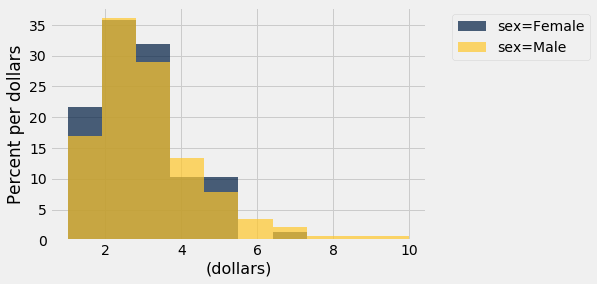

In [4]:
tips.hist('tip',unit="dollars",group="sex")

b. Repeat part a, but broken down by time.

C:\Users\C20Lydia.Knutson\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


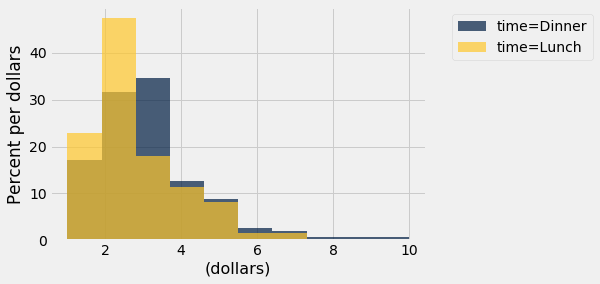

In [5]:
tips.hist('tip',unit="dollars",group="time")

2) Create a function called weekday_to_num. This function inputs a string denoting day of
the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues =
2, … Sun = 7).

In [6]:
def weekday_to_num(day):
    if day=="Mon" :
        return 1
    elif day=="Tues" :
        return 2
    elif day=="Wed" :
        return 3
    elif day=="Thur" :
        return 4
    elif day=="Fri" :
        return 5
    elif day=="Sat" :
        return 6
    elif day=="Sun" :
        return 7

In [7]:
weekday_to_num("Tues")

2

3) Apply this function to the day column of tips and include the result as a new column in
tips, called weekday_num.

In [8]:
weekdays=tips.apply(weekday_to_num,'day')
tips.with_column('weekday_num',weekdays)

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


4) Create a function called est_tip. The goal of this function is to predict tip amount
based on the value of the bill (total_bill). To do this, we will look at “nearby” values
(i.e. tip, where the value of total_bill is near the value of interest.) For example, if
we want to predict the tip for total bill value of $20, we will simply look at all total bills
near $20 and average the tip amount. The input of est_tip should be the total bill
amount and the window, or the difference in total bill we would consider “nearby”. For
example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of
this function will be the predicted tip amount.

In [9]:
def est_tip(bill,nearby=1):
    close_points=tips.where('total_bill',are.between(bill-nearby,bill+nearby))
    return close_points.column('tip').mean()

In [10]:
est_tip(20)

3.143333333333333

5) Apply this function to the total_bill column of tips and include the result as a new
column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip
amount.

In [11]:
expected_tips=tips.apply(est_tip,'total_bill')
revised=tips.with_column('expected tip',expected_tips)
revised

total_bill,tip,sex,smoker,day,time,size,expected tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


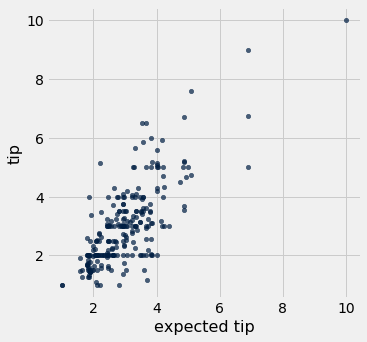

In [12]:
revised.scatter('expected tip','tip')